# Lecture 11


### More iterative methods

Lecture notes [here](https://drive.google.com/file/d/1nOb-FEG-tS6_7J7qIcBoL7hRIz62l7Gq/view?usp=sharing).

## The Gauss-Seidel Algorithm

Our goal is still to solve but now we include more in our inverse:
$$ A\vec x = \vec b$$
$$ (L + D + U) \vec x = \vec b$$
$$ (U + D)^{-1}( L + D + U) \vec x = (U + D)^{-1}\vec b$$
$$ \vec x + (U + D)^{-1}U \vec x = (U + D)^{-1}\vec b$$

So, we can now attempt to apply the matrix iteration with $M = - (U + D)^{-1}U$ and $\vec b$ replaced with $(U + D)^{-1}\vec b$.

This is the Gauss-Seidel algorithm.  But some care should be taken on the implementation:

```
INPUT: An n x n matrix A, an n x 1 vector b, an error tolerance err, a maximum number of steps K
OUPUT: An approximation of the solution of A*x = b

STEP 1: Set y = zeros(n,1)
STEP 2: Set L = tril(A,-1); U = triu(A,1); D = diag(A);
STEP 3: Set c = (U+D)^{-1} b
STEP 4: For i = 1 to T do STEPS 5-7
    STEP 5: Set z = U*y
    STEP 6: Set z = (U+D)^{-1}(b-z)
    STEP 7:If max(abs(y-z)) < err
        y = z
        OUTPUT(y)
    STEP 8: Set y = z
STEP 9: If i == T
    PRINT("Error tolerance not acheived")
    OUTPUT(y)
```

In [1]:
A = diag([1,2,3,4,5]) + .1*randn(5);
UpD = triu(A);
L = tril(A,-1);
b = [1,1,1,1,1]';
y = zeros(5,1);

In [2]:
UpD


UpD =

    1.0538   -0.1308   -0.1350   -0.0205    0.0671
         0    1.9566    0.3035   -0.0124   -0.1207
         0         0    3.0725    0.1490    0.0717
         0         0         0    4.1409    0.1630
         0         0         0         0    5.0489



In [3]:
L


L =

         0         0         0         0         0
    0.1834         0         0         0         0
   -0.2259    0.0343         0         0         0
    0.0862    0.3578   -0.0063         0         0
    0.0319    0.2769    0.0715    0.1417         0



Note that we could easily replace $U + D$ with $L + D$ in the code, and then do forward substitution.  We would have to modify our `Forsub` routine because that assumes the lower-triangular matrix has zeros on the diagonal.

In [11]:
% compute y = -(L+D)^{-1}Uy + (L+D)^{-1}b
format long
y = L*y;
y = Backsub([UpD,b-y])


y =

   1.036923173017289
   0.365262497211924
   0.385013333731710
   0.182590623033580
   0.160905522918324



In [12]:
A*y-b


ans =

   1.0e-09 *

                   0
   0.047716719464574
  -0.073087869090216
  -0.127343247058320
  -0.306138892014474



## Compare the Jacobi and Gauss-Seidel algorithms

In [13]:
A = diag([1,2,3,4,5]) + .1*randn(5);
L = tril(A,-1);
U = triu(A,+1);
D = diag(A);
LpU = L + U; % L + U
UpD = triu(A);
b = [1,1,1,1,1]';

y_gs = zeros(5,1);
y_j = zeros(5,1);
format long
x = A\b;  % solves Ax = b

In [24]:
y_j = LpU*y_j;
y_j = (b-y_j)./D
y_gs = L*y_gs;
y_gs = Backsub([UpD,b-y_gs])
[y_j-x,y_gs-x]


y_j =

   0.821994865082104
   0.497703662514302
   0.360684142087404
   0.232939927529233
   0.253012897564253


y_gs =

   0.821994865082184
   0.497703662514338
   0.360684142087428
   0.232939927529288
   0.253012897564216


ans =

   1.0e-13 *

  -0.802691246803988  -0.001110223024625
  -0.359712259978551                   0
  -0.241473507855972                   0
  -0.547617506896358   0.000277555756156
   0.374700270810990   0.000555111512313



In [25]:
A = diag([1,2,3,4,5]) + .1*randn(5);
L = tril(A,-1);
U = triu(A,+1);
D = diag(A);
LpU = L + U; % L + U
UpD = triu(A);
b = [1,1,1,1,1]';

y_gs = zeros(5,1);
y_j = zeros(5,1);
format long
x = A\b;  % solves Ax = b

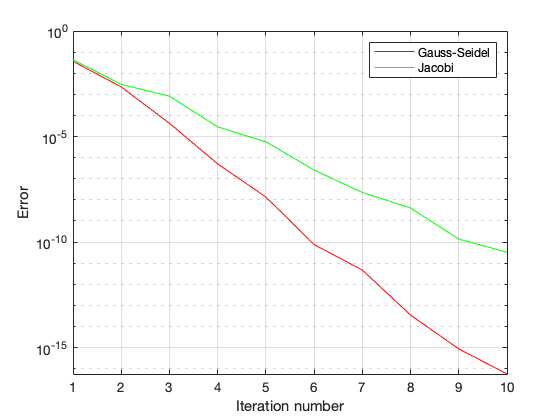

In [26]:
T = 10;
err_gs = zeros(1,T);
err_j = zeros(1,T);

for i = 1:T
    y_j = LpU*y_j;
    y_j = (b-y_j)./D ;
    y_gs = L*y_gs;
    y_gs = Backsub([UpD,b-y_gs]);
    err_gs(i) = max(abs(y_gs-x));
    err_j(i) = max(abs(y_j-x));
end
semilogy(1:T,err_gs,'r')
hold on
grid on
semilogy(1:T,err_j,'g')
legend('Gauss-Seidel','Jacobi')
xlabel('Iteration number')
ylabel('Error')

## A computational subtlety 

When we multply by $L$ in the Gauss-Seidel algorithm, $L$ has a lot of zeros.  So, we should be tempted to make use of this structure so that we can do fewer multiplications and additions.  In theory this is a good idea and if you were developing low-level code in C or Fortran, you should probably be doing this.  But as we can see in the following example, coding it ourselves does not save time.

In [28]:
n = 2000; L = tril(randn(n,n),-1); b = randn(n,1);
tic();
L*b;
toc();
tic();
multL(L,b);
toc();

Elapsed time is 0.002123 seconds.
Elapsed time is 0.035343 seconds.


## Convergence

A fundamental question is "When does Jacobi's algorithm/the Gauss-Seidel algorithm work?" A more mathematical way to phrase this is, under what conditions on $A$ does
$$
\lim_{k \to \infty} \vec x_k = \vec x, \quad A \vec x = \vec b.
$$

#### Definition

An $n \times n$ matrix $A$ is said to be __diagonally dominant__ if

$$ |a_{ii}| > \sum_{j=1,~~i\neq j}^n |a_{ij}|, ~~\text{for all}~~ 1 \leq i \leq n.$$

#### Theorem

Jacobi's method and the Gauss-Seidel method converge if $A$ is __diagonally dominant__.